In [2]:
from fenics import *
import numpy as np
# initla setting,eg:dt,dx,dy,domian
T =2.0
num_steps = 10
dt = T / num_steps
nx= ny=8
mesh = UnitSquareMesh(nx,ny)  # 在单位域进行网格划分
V = FunctionSpace(mesh,'P',1)



alpha =3
beta =1.2
# 初始条件，其t可以任意设置以便表示边界条件，= 这里t=0表示初始条件，
u_D = Expression('1+x[0]*x[0] + alpha*x[1]*x[1]+ beta * t',degree=2 , alpha=alpha , beta=beta , t=0)

def boundary( x , on_boundary ) :
     return on_boundary
bc = DirichletBC(V, u_D, boundary )
u_n=project(u_D,V)  # or u_n=interpolate(u_D,V)


t=0.2:error=0.0029841154298013706
t=0.4:error=0.0006453466324685131
t=0.6000000000000001:error=0.00012953623563083383
t=0.8:error=2.5530585487043567e-05
t=1.0:error=5.010863127097309e-06
t=1.2:error=9.82564398732677e-07
t=1.4:error=1.9262877115622246e-07
t=1.5999999999999999:error=3.776260637522455e-08
t=1.7999999999999998:error=7.402842783221786e-09
t=1.9999999999999998:error=1.4512195889437862e-09


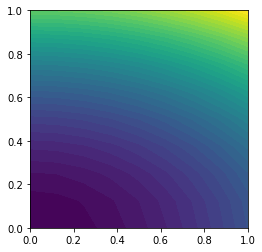

In [3]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant( beta - 2 - 2* alpha )
F = u*v*dx + dt * dot ( grad ( u ) , grad ( v ) ) *dx - (u_n + dt * f ) *v*dx
a , L = lhs(F) , rhs(F)

u=Function(V)
t =0
for n in range(num_steps):
    # update current time
    t += dt
    u_D.t = t
    solve(a==L,u,bc)
    plot(u)
    # 计算节点上的误差
    u_e = interpolate(u_D,V)
    error = np.abs(np.array(u_e.vector())-np.array(u.vector())).max()
    print('t={}:error={}'.format(t,error))
    #update previous solution
    u_n.assign(u)


In [4]:
np.array(u_n.vector())

array([6.4     , 5.696875, 6.415625, 5.0875  , 5.7125  , 6.4625  ,
       4.571875, 5.103125, 5.759375, 6.540625, 4.15    , 4.5875  ,
       5.15    , 5.8375  , 6.65    , 3.821875, 4.165625, 4.634375,
       5.228125, 5.946875, 6.790625, 3.5875  , 3.8375  , 4.2125  ,
       4.7125  , 5.3375  , 6.0875  , 6.9625  , 3.446875, 3.603125,
       3.884375, 4.290625, 4.821875, 5.478125, 6.259375, 7.165625,
       3.4     , 3.4625  , 3.65    , 3.9625  , 4.4     , 4.9625  ,
       5.65    , 6.4625  , 7.4     , 3.415625, 3.509375, 3.728125,
       4.071875, 4.540625, 5.134375, 5.853125, 6.696875, 3.4625  ,
       3.5875  , 3.8375  , 4.2125  , 4.7125  , 5.3375  , 6.0875  ,
       3.540625, 3.696875, 3.978125, 4.384375, 4.915625, 5.571875,
       3.65    , 3.8375  , 4.15    , 4.5875  , 5.15    , 3.790625,
       4.009375, 4.353125, 4.821875, 3.9625  , 4.2125  , 4.5875  ,
       4.165625, 4.446875, 4.4     ])

In [5]:
print(np.array(interpolate(u_D,V).vector()))

print(u_D.t)
np.array(project(u_D,V).vector())

[6.4      5.696875 6.415625 5.0875   5.7125   6.4625   4.571875 5.103125
 5.759375 6.540625 4.15     4.5875   5.15     5.8375   6.65     3.821875
 4.165625 4.634375 5.228125 5.946875 6.790625 3.5875   3.8375   4.2125
 4.7125   5.3375   6.0875   6.9625   3.446875 3.603125 3.884375 4.290625
 4.821875 5.478125 6.259375 7.165625 3.4      3.4625   3.65     3.9625
 4.4      4.9625   5.65     6.4625   7.4      3.415625 3.509375 3.728125
 4.071875 4.540625 5.134375 5.853125 6.696875 3.4625   3.5875   3.8375
 4.2125   4.7125   5.3375   6.0875   3.540625 3.696875 3.978125 4.384375
 4.915625 5.571875 3.65     3.8375   4.15     4.5875   5.15     3.790625
 4.009375 4.353125 4.821875 3.9625   4.2125   4.5875   4.165625 4.446875
 4.4     ]
1.9999999999999998


array([6.39199915, 5.68612585, 6.40487585, 5.07710896, 5.70219256,
       6.45210896, 4.56146026, 5.09268752, 5.74893752, 6.53021026,
       4.13958271, 4.57708588, 5.13958972, 5.82708588, 6.63958271,
       3.81145753, 4.1552071 , 4.62395743, 5.21770743, 5.9364571 ,
       6.78020753, 3.57707051, 3.8270937 , 4.20208014, 4.70208514,
       5.32708014, 6.0770937 , 6.95207051, 3.43662458, 3.59265372,
       3.87396878, 4.28020702, 4.81145702, 5.46771878, 6.24890372,
       7.15537458, 3.38837542, 3.45224957, 3.63957054, 3.95208221,
       4.38958458, 4.95208221, 5.63957054, 6.45224957, 7.38837542,
       3.40537458, 3.49890372, 3.71771878, 4.06145702, 4.53020702,
       5.12396878, 5.84265372, 6.68662458, 3.45207051, 3.5770937 ,
       3.82708014, 4.20208514, 4.70208014, 5.3270937 , 6.07707051,
       3.53020753, 3.6864571 , 3.96770743, 4.37395743, 4.9052071 ,
       5.56145753, 3.63958271, 3.82708588, 4.13958972, 4.57708588,
       5.13958271, 3.78021026, 3.99893752, 4.34268752, 4.81146

In [16]:
# 获取节点值和对应坐标
u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
coor = mesh.coordinates()
if mesh.num_vertices() == len(u_array):
    for i in range(mesh.num_vertices()):
        print('u({},{}) = {}，true_data= {}'.format(coor[i][0], coor[i][1], u_array[i],u((coor[i][0], coor[i][1]))))
        
      

u(0.0,0.0) = 6.3999999999999995，true_data= 3.3999999999999995
u(0.125,0.0) = 5.6968749999999995，true_data= 3.4156249999999995
u(0.25,0.0) = 6.4156249999999995，true_data= 3.4624999999999995
u(0.375,0.0) = 5.0874999999999995，true_data= 3.5406249999999995
u(0.5,0.0) = 5.712499999793698，true_data= 3.6499999999999995
u(0.625,0.0) = 6.4624999999999995，true_data= 3.7906249999999995
u(0.75,0.0) = 4.5718749999999995，true_data= 3.9624999999999995
u(0.875,0.0) = 5.103124999614217，true_data= 4.1656249999999995
u(1.0,0.0) = 5.759374999614231，true_data= 4.3999999999999995
u(0.0,0.125) = 6.5406249999999995，true_data= 3.446875
u(0.125,0.125) = 4.149999999999997，true_data= 3.4624999997812753
u(0.25,0.125) = 4.587499999491235，true_data= 3.5093749996005252
u(0.375,0.125) = 5.149999999282297，true_data= 3.587499999482816
u(0.5,0.125) = 5.837499999491316，true_data= 3.6968749994447614
u(0.625,0.125) = 6.6499999999999995，true_data= 3.8374999994912247
u(0.75,0.125) = 3.821874999999999，true_data= 4.009374999614

In [27]:
help(AutoSubDomain)

Help on class AutoSubDomain in module dolfin.fem.dirichletbc:

class AutoSubDomain(dolfin.cpp.mesh.SubDomain)
 |  AutoSubDomain(inside_function)
 |  
 |  Wrapper class for creating a SubDomain from an inside() function.
 |  
 |  Method resolution order:
 |      AutoSubDomain
 |      dolfin.cpp.mesh.SubDomain
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, inside_function)
 |      Create SubDomain subclass for given inside() function
 |  
 |  inside(self, x, on_boundary)
 |      Return true for points inside the subdomain
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from dolfin.cpp.mesh.SubDomain:
 |  
 |  get_property(...)
 |      get_property(self: dolfin.cpp.mesh.SubDomai

In [28]:
help(u)

Help on Function in module dolfin.function.function object:

class Function(ufl.coefficient.Coefficient)
 |  Function(*args, **kwargs)
 |  
 |  UFL form argument type: Representation of a form coefficient.
 |  
 |  Method resolution order:
 |      Function
 |      ufl.coefficient.Coefficient
 |      ufl.core.terminal.FormArgument
 |      ufl.core.terminal.Terminal
 |      ufl.core.expr.Expr
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __float__(self)
 |      Try to evaluate as scalar and cast to float.
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize Function.
 |  
 |  __str__(self)
 |      Return a pretty print representation of it self.
 |  
 |  assign(self, rhs)
 |      Assign either a Function or linear combination of Functions.
 |      
 |      *Arguments*
 |          rhs (_Function_)
 |              A Function or a linear combination of Functions. If a linear
 |              co